In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
def prettyTable(dataframe, column):
    z = pd.DataFrame(columns = [dataframe[column].value_counts(True).index, round(dataframe[column].value_counts(True) * 100, 2).astype(str) + '%', dataframe[column].value_counts()]).T
    return z

## Goals

The management would like you to answer the following:
* Are there products that do not sell as well in some locations?
* Are there any other patterns over time in each region that you can find in the data?

Viz:
* line chart showingn sales over time
    * dual axis showing profit over time
* scatter plot showing discount and profit, or sales and profit
    * legend is category
* box plot showing quantity by category
* box plot showing quantity by sub-category

Analysis:
* How does Discount relate to Profit?
* How does Category relate to Profit?
* How does Sub-Category relate to Profit?
* How does Ship Mode relate to Category, Sales, Discounnt, Profit?

In [2]:
df = pd.read_csv('office_supplies.csv')
df

,Order ID,Order Date,Ship Mode,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,CA-2015-110870,2015-12-12,First Class,West,TEC-AC-10002926,Technology,Accessories,Logitech Wireless Marathon Mouse M705,299.940,6,0.0,NaN
1,CA-2015-110870,2015-12-12,First Class,West,OFF-SU-10001225,Office Supplies,Supplies,Staple remover,25.760,7,0.0,NaN
2,CA-2014-143210,2014-12-01,First Class,East,TEC-PH-10004434,Technology,Phones,Cisco IP Phone 7961G VoIP phone - Dark gray,271.900,2,0.0,NaN
3,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10003878,Furniture,Furnishings,"Linden 10"" Round Wall Clock, Black",45.840,3,0.0,NaN
4,CA-2014-143210,2014-12-01,First Class,East,FUR-FU-10002268,Furniture,Furnishings,Ultra Door Push Plate,9.820,2,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
9988,US-2015-165743,2015-11-20,Second Class,West,OFF-BI-10001758,Office Supplies,Binders,Wilson Jones 14 Line Acrylic Coated Pressboard...,9.612,6,0.7,-7.3692
9989,US-2017-105998,2017-11-03,First Class,West,TEC-AC-10004469,Technology,Accessories,Microsoft Sculpt Comfort Mouse,199.750,5,0.0,87.8900
9990,US-2017-105998,2017-11-03,First Class,West,FUR-TA-10001095,Furniture,Tables,Chromcraft Round Conference Tables,1673.184,12,0.2,20.9148
9991,US-2014-148194,2014-05-04,First Class,West,FUR-FU-10001852,Furniture,Furnishings,"Eldon Regeneration Recycled Desk Accessories, ...",12.180,7,0.0,3.8976


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        8000 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


In [4]:
# what to do about the missing profit values?

In [5]:
df[df.Profit.isna()]
df[(df.Profit.isna()) & (df['Order ID'].str.contains('CA'))]
prettyTable(df[df.Profit.isna()], 'Region')

,,
,Region,Region
West,30.01%,598
East,29.0%,578
Central,25.39%,506
South,15.6%,311


In [7]:
prettyTable(df, 'Category')

,,
,Category,Category
Office Supplies,60.3%,6026
Furniture,21.22%,2121
Technology,18.47%,1846


In [8]:
prettyTable(df, 'Sub-Category')

,,
,Sub-Category,Sub-Category
Binders,15.24%,1523
Paper,13.71%,1370
Furnishings,9.58%,957
Phones,8.89%,888
Storage,8.47%,846
Art,7.97%,796
Accessories,7.76%,775
Chairs,6.17%,617
Appliances,4.66%,466


In [9]:
df[~df['Profit'].isna()].describe()

,Sales,Quantity,Discount,Profit
count,8000.000000,8000.000000,8000.000000,8000.000000
mean,229.823459,3.786875,0.152864,28.134233
std,621.031927,2.211349,0.203951,227.328814
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.814700
50%,54.352000,3.000000,0.150000,8.765100
75%,211.870000,5.000000,0.200000,29.950500
max,22638.480000,14.000000,0.800000,8399.976000


In [10]:
df[df['Profit'] > -1000].describe()

,Sales,Quantity,Discount,Profit
count,7981.000000,7981.000000,7981.000000,7981.000000
mean,221.533630,3.782859,0.151699,33.073146
std,547.025678,2.211065,0.202621,192.776782
min,0.444000,1.000000,0.000000,-950.400000
25%,17.300000,2.000000,0.000000,1.870400
50%,53.920000,3.000000,0.150000,8.790600
75%,209.970000,5.000000,0.200000,29.994000
max,17499.950000,14.000000,0.800000,8399.976000


In [11]:
df[df['Profit'] < 8000].describe()

,Sales,Quantity,Discount,Profit
count,7999.000000,7999.000000,7999.000000,7999.000000
mean,227.664423,3.786723,0.152883,27.087622
std,590.281910,2.211446,0.203957,207.172870
min,0.444000,1.000000,0.000000,-6599.978000
25%,17.340000,2.000000,0.000000,1.814600
50%,54.336000,3.000000,0.150000,8.763000
75%,211.504000,5.000000,0.200000,29.950000
max,22638.480000,14.000000,0.800000,5039.985600


<AxesSubplot:xlabel='Profit'>

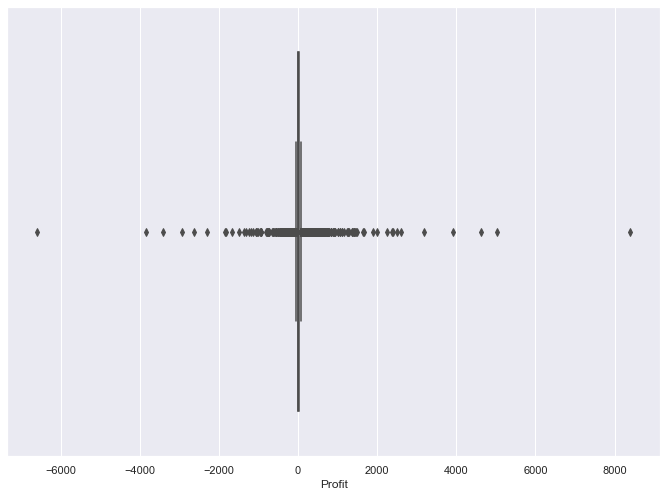

In [12]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df[~df['Profit'].isna()]['Profit'])

In [13]:
q75, q25 = np.percentile(df[~df['Profit'].isna()]['Profit'], [75 ,25])
iqr = q75 - q25
iqr

28.135800000000003

In [14]:
display(df[~df['Profit'].isna()]['Profit'].mean())
display(df[~df['Profit'].isna()]['Profit'].median())

28.13423282500004

8.7651

In [32]:
perc_95 = np.percentile(df[~df['Profit'].isna()]['Profit'], 90)
perc_10 = np.percentile(df[~df['Profit'].isna()]['Profit'], 10)
display(perc_95)
display(perc_10)

prof_mean_10_95 = df[(df['Profit'] < perc_95) & (df['Profit'] > perc_10)]['Profit'].mean()
display(prof_mean_10_95)

df['Profit'].fillna(prof_mean_10_95, inplace = True)

74.8142

-8.419320000000011

15.281890754440154

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9993 entries, 0 to 9992
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order ID      9993 non-null   object 
 1   Order Date    9993 non-null   object 
 2   Ship Mode     9993 non-null   object 
 3   Region        9993 non-null   object 
 4   Product ID    9993 non-null   object 
 5   Category      9993 non-null   object 
 6   Sub-Category  9993 non-null   object 
 7   Product Name  9993 non-null   object 
 8   Sales         9993 non-null   float64
 9   Quantity      9993 non-null   int64  
 10  Discount      9993 non-null   float64
 11  Profit        9993 non-null   float64
dtypes: float64(3), int64(1), object(8)
memory usage: 937.0+ KB


<AxesSubplot:xlabel='Profit'>

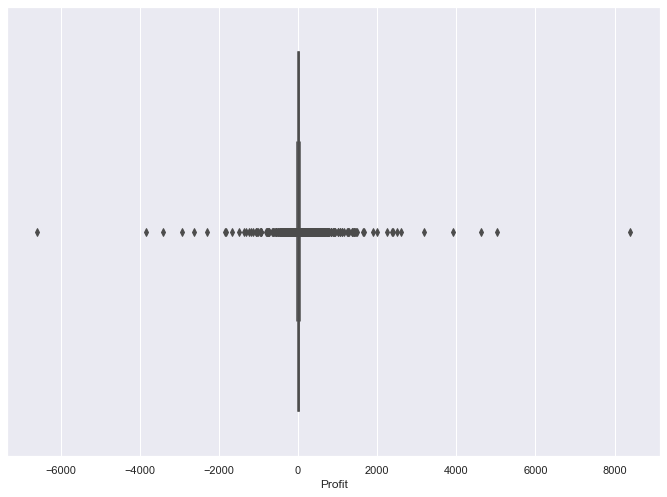

In [36]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Profit'])

<AxesSubplot:xlabel='Sales'>

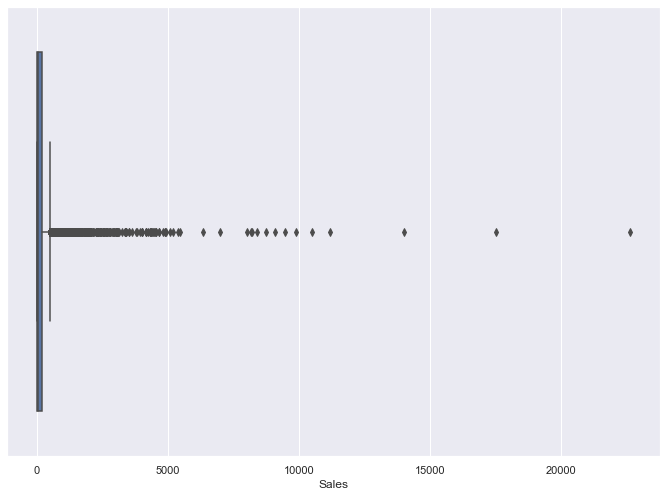

In [37]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Sales'])

<AxesSubplot:xlabel='Quantity'>

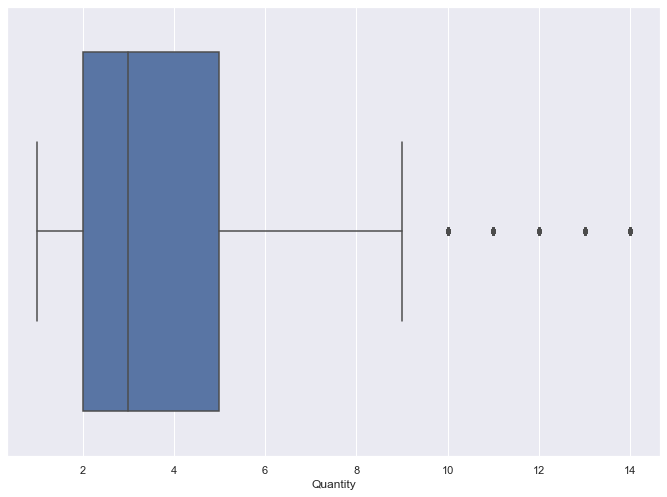

In [38]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Quantity'])

<AxesSubplot:xlabel='Discount'>

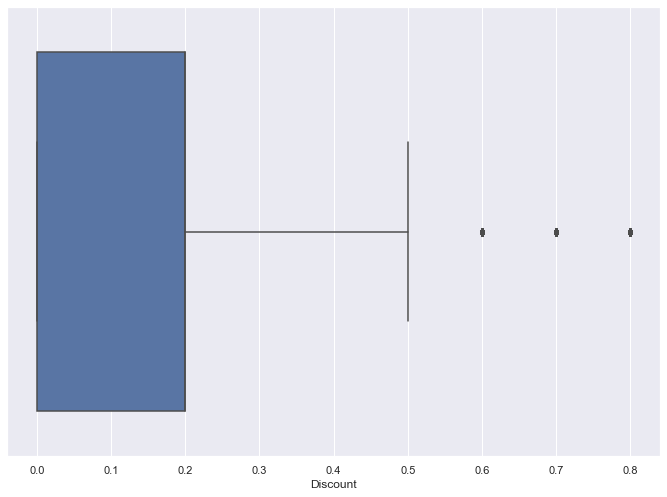

In [39]:
sns.set(rc={'figure.figsize':(11.7,8.27)})
sns.boxplot(x = df['Discount'])

<AxesSubplot:xlabel='Order Date', ylabel='Sales'>

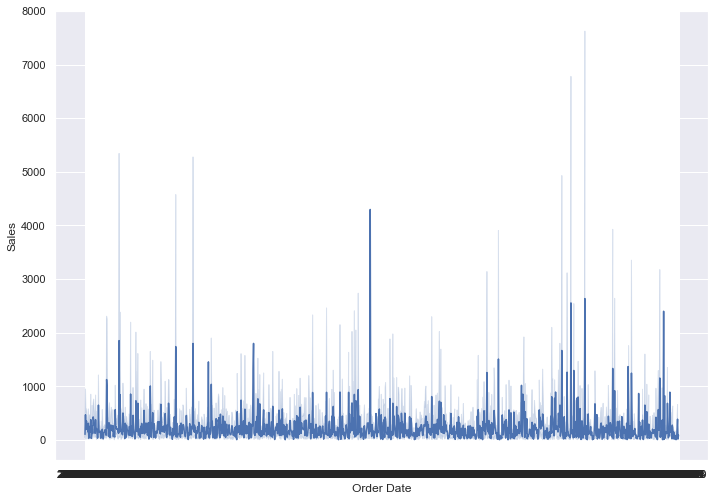

In [42]:
sns.lineplot(data = df, x = 'Order Date', y = 'Sales')

<AxesSubplot:xlabel='Order Date', ylabel='Profit'>

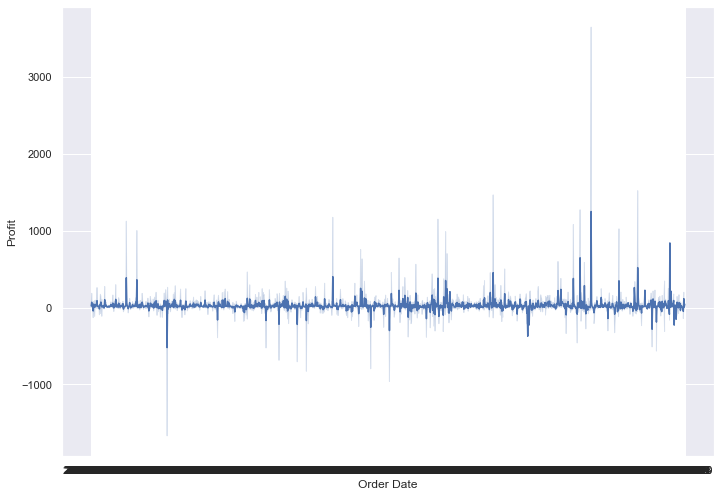

In [43]:
sns.lineplot(data = df, x = 'Order Date', y = 'Profit')

In [54]:
df = df.sort_values('Order Date')

In [55]:


df['Running Sales'] = df['Sales'].cumsum()
df['Running Profit'] = df['Profit'].cumsum()

<AxesSubplot:xlabel='Order Date', ylabel='Running Sales'>

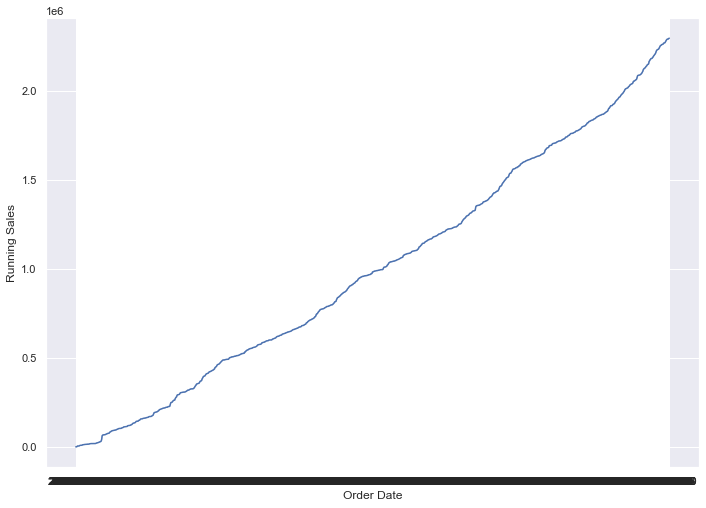

In [56]:
sns.lineplot(data = df, x = 'Order Date', y = 'Running Sales')

<AxesSubplot:xlabel='Order Date', ylabel='Running Profit'>

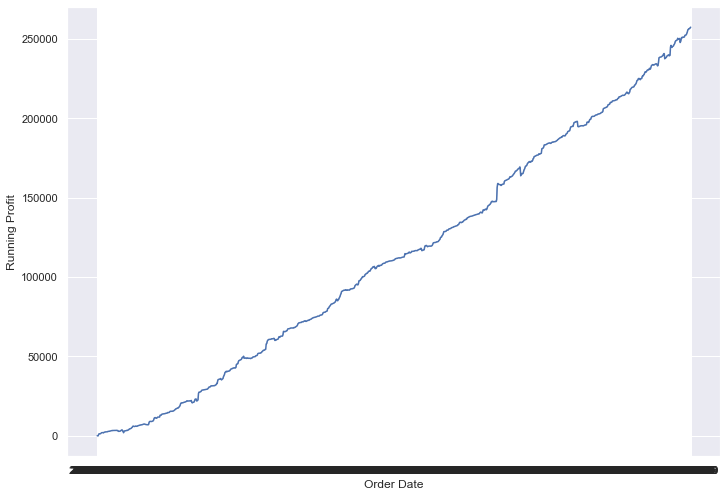

In [57]:
sns.lineplot(data = df, x = 'Order Date', y = 'Running Profit')

In [58]:
display(df['Order Date'].min())
display(df['Order Date'].max())

'2014-01-03'

'2017-12-30'

In [60]:
sales_by_date = df['Running Sales'].groupby(df['Order Date']).sum()

In [70]:
sales_by_date = pd.DataFrame(sales_by_date)['Running Sales'].cumsum()

<AxesSubplot:xlabel='Order Date', ylabel='Running Sales'>

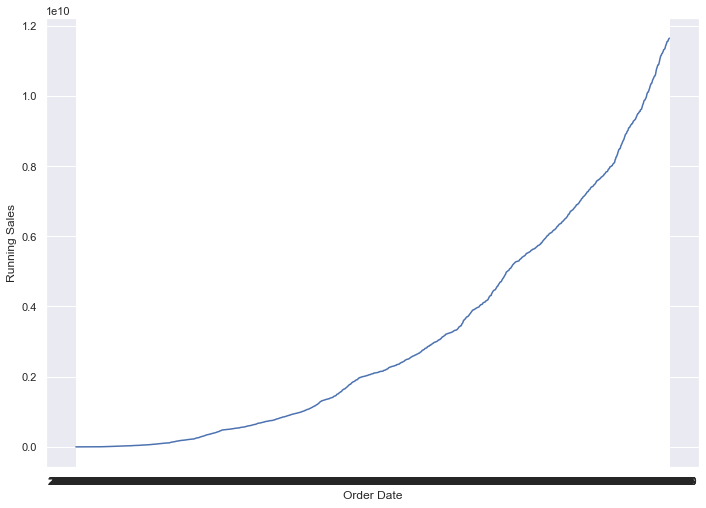

In [71]:
sns.lineplot(data = sales_by_date)

In [72]:
df['Sales'].groupby(df['Region']).sum()

Region
Central    500975.9308
East       678781.2400
South      391721.9050
West       725457.8245
Name: Sales, dtype: float64

In [73]:
df['Profit'].groupby(df['Region']).sum()

Region
Central    42311.328598
East       81859.685922
South      43816.640055
West       89450.167534
Name: Profit, dtype: float64

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

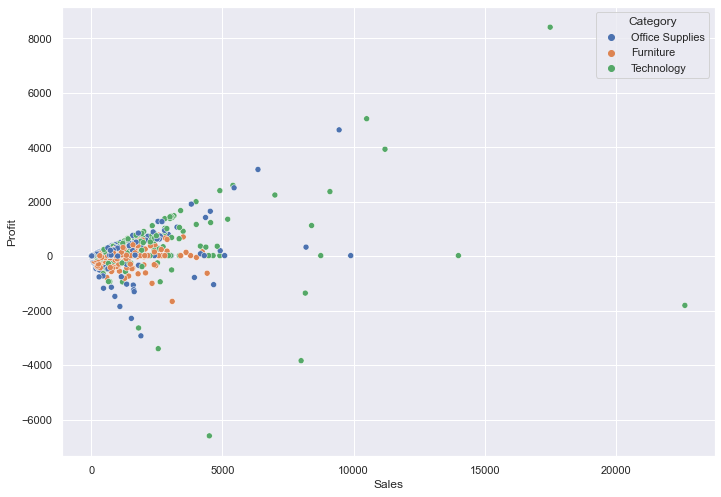

In [75]:
sns.scatterplot(data = df, x = 'Sales', y = 'Profit', hue = 'Category')

<AxesSubplot:xlabel='Sales', ylabel='Profit'>

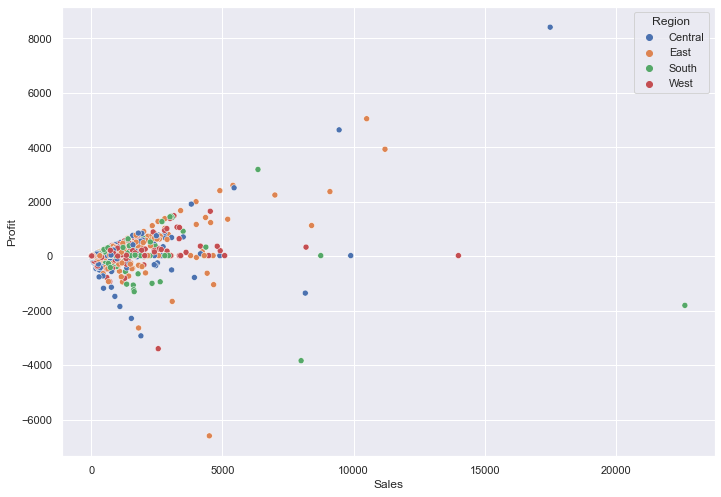

In [77]:
sns.scatterplot(data = df, x = 'Sales', y = 'Profit', hue = 'Region')

### Takeaways

* a lot of missing values, replaced with the mean of the middle 80% of values, so that the extreme values don't influence the mean. We can update this later if we can get exact figures for the transactions or we can get pricing per item